<a href="https://colab.research.google.com/github/MingzheHu-Duke/CS5343/blob/main/CS534HW1Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# Import the packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import mean_squared_error as MSE
%matplotlib inline
plt.style.use('seaborn-white')

**3.a.**

In [79]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,lamda = 1, num_iters=10000, lr=5E-3, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

No handles with labels found to put in legend.


(4.3014451866640424e-05,
 2.316047106215827,
 -0.050020735702087406,
 1.0504354497438355)

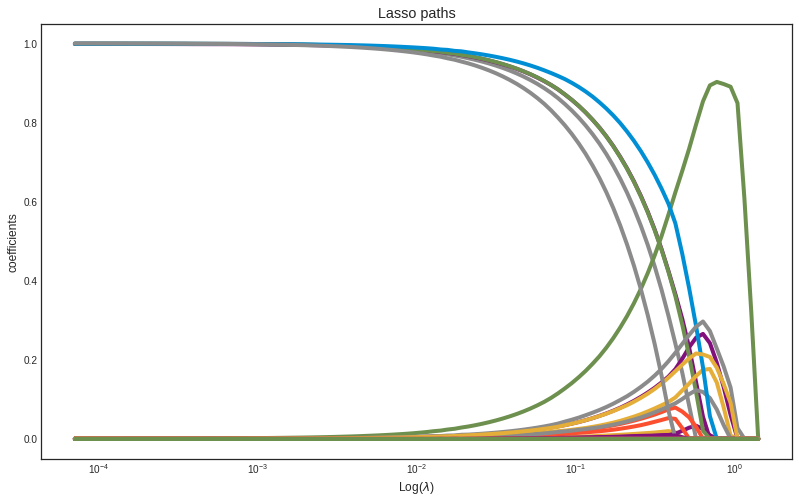

In [80]:
# Load the train data
df_x = pd.read_csv("HW1_3X.csv")
df_x = pd.read_csv("HW1_3Y.csv")
X = df_x.to_numpy()
y = df_y.to_numpy().flatten()

X / np.linalg.norm(X,axis=0)  # Standardize data (easier to set the l1_ratio parameter)
m,n = X.shape

eps = 5e-5  # the smaller it is the longer is the path

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, eps, fit_intercept=False)

# Display results
plt.figure(figsize = (12,8))
#neg_log_alphas_lasso = -np.log10(alphas_lasso)

for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title("Lasso paths")
plt.legend()
plt.axis('tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


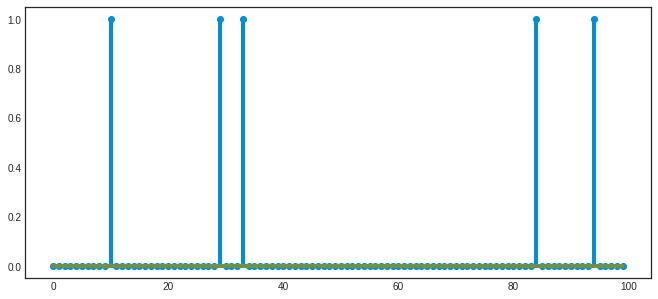

In [110]:
# List the coefficients
plt.figure(figsize=(10, 5))
plt.stem(coefs_lasso[:, -1])
plt.show()

As we can see there are only five coefficients left.

In [69]:
coefs_lasso[:, -1]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.60665425e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00013995e+00,  0.00000000e+00,
        0.00000000e+00,  1.26889926e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.35489351e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.48770126e-05, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  9.98914776e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  9.99390054e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.22922175e-05,
        0.00000000e+00,  

In [76]:
coef_list = coefs_lasso[:, -1] > 1E-3
[i+1 for i, x in enumerate(coef_list) if x]

[11, 30, 34, 85, 95]

As we can see the indices of the nonzero weights are 11, 30, 34, 85, 95
(indice start from 1)

In [81]:
coefs_lasso[:, -1][coef_list]

array([1.00013995, 0.99891478, 0.99939005, 0.99947904, 1.00041471])

**3.b.**

In [96]:
from sklearn import linear_model
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


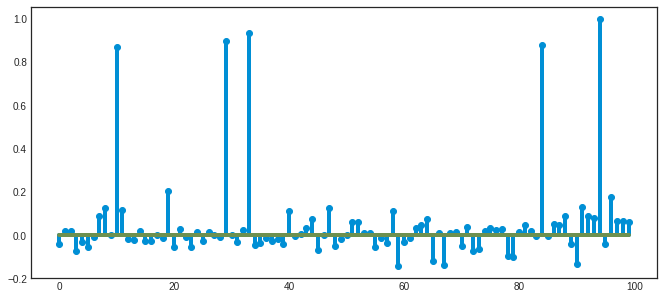

In [109]:
plt.figure(figsize=(10, 5))
plt.stem(clf.coef_)
plt.show()

**3.c**

In [86]:
# Load the test data set
X_test = pd.read_csv("HW1_3Xtest.csv").to_numpy()
y_test = pd.read_csv("HW1_3Ytest.csv").to_numpy().flatten()

MSE of our LASSO regression

In [90]:
y_pred = X_test @ coefs_lasso[:, -1]
MSE(y_test, y_pred)

1.5893230468966845e-06

MSE of the ordinary linear regression

In [97]:
MSE(y_test, clf.predict(X_test))

0.03862981748820247

As we can see that the MSE of the Lasso regression is smaller than the 
Ordinary lineare regression. Which means that the LASSO has a better prediction performance on this task.